# T10 Data Science Challenge

## 1) Data Understanding Process

### 1.1) Conhecendo as variáveis envolvidas:

**Características do cliente:**  
-age: (numeric)    
-job: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services")  
-marital: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)    
-education: (categorical: "unknown","secondary","primary","tertiary")    
-default: has credit in default? (binary: "yes","no")  
-balance: average yearly balance, in euros (numeric)    
-housing: has housing loan? (binary: "yes","no")  
-loan: has personal loan? (binary: "yes","no") 

**Características da campanha:**  
-contact: contact communication type (categorical: "unknown","telephone","cellular")  
-day: last contact day of the month (numeric)  
-month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
-duration: last contact duration, in seconds (numeric)   
-campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  


**Caracteristicas do contato ou campanha anterior:**   
-pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric,.1 means client was not previously contacted)  
-previous: number of contacts performed before this campaign and for this client (numeric)  
-poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Variável alvo:**   
-y: has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
#Importando dados

import numpy as np
import pandas as pd

camp_df =pd.read_csv('https://raw.githubusercontent.com/t10d/data-insight-assessment/master/data/campaigns.csv', index_col=0)

print(camp_df.shape)

(40690, 17)


In [2]:
camp_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Verificando como estão os dados no dataset (em termos de duplicidade e valores nulos)

print(camp_df.duplicated().sum())
print(camp_df.isnull().sum().sum())
print(camp_df.isna().sum().sum())

0
0
0


In [4]:
#Checagem das variáveis por data types

camp_df.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

In [5]:
#Avaliando variaveis de uma forma geral

camp_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,40690.000000,40690,40690,40690,40690,40690.000000,40690,40690,40690,40690.000000,40690,40690.000000,40690.000000,40690.000000,40690.000000,40690,40690
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,8769,24464,20951,39965,NaN,22661,34177,26319,NaN,12413,NaN,NaN,NaN,NaN,33284,35903
mean,40.905407,NaN,NaN,NaN,NaN,1359.697518,NaN,NaN,NaN,15.808405,NaN,258.243844,2.764586,40.059867,0.579405,NaN,NaN
std,10.604908,NaN,NaN,NaN,NaN,3034.248783,NaN,NaN,NaN,8.318281,NaN,257.577068,3.110158,100.078281,2.350664,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1423.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

mypalette = ['indianred','seagreen']
sns.set_palette(mypalette)

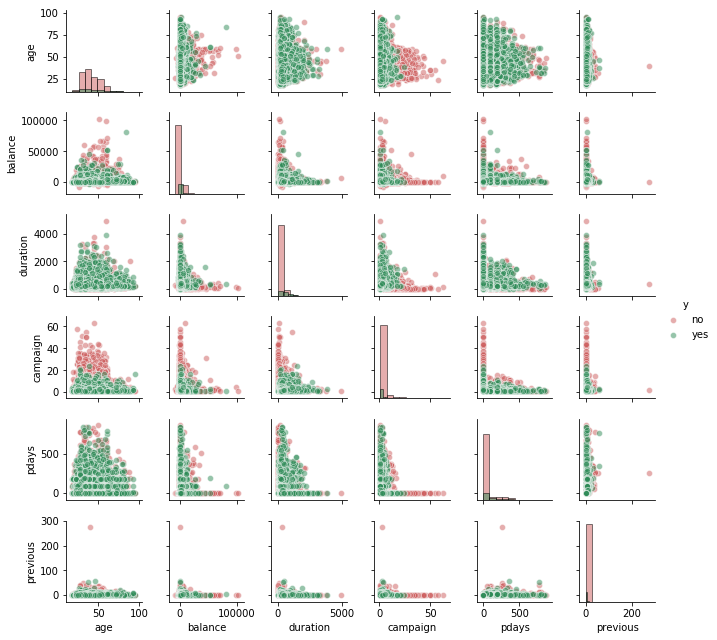

In [7]:
#Verificando a correlação entre as variaveis numéricas e a distribuição

num_columns = ['age', 'balance','duration', 'campaign', 'pdays', 'previous', 'y']

sns.pairplot(camp_df[num_columns], diag_kind='hist',  hue= 'y', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

#Pela visualização abaixo é possível verificar que existem outliers, especialmente as variáveis "campaign", "pdays" e "previous"
#Vamos avaliar cada variavel numerica na sequencia (não apenas 'campaign', 'pdays' e 'previous')

,age
count,40690.000000
mean,40.905407
std,10.604908
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


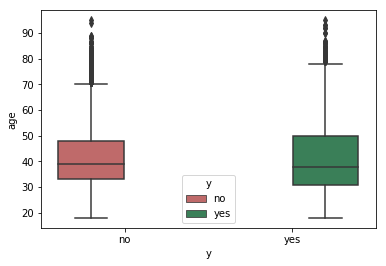

In [8]:
#Vamos corrigir os outliers da forma mais simples, pelo uso das extremidades dos quadris do boxplot


#Corrigindo age primeiro (veja que 75% dos dados, isto é, 30.517 tem uma idade de até 48 anos). Nesse caso vamos 
#usar x > Q3 + 1,5×AIQ, onde AIQ = Q3-Q1

sns.boxplot(x='y', y='age', data=camp_df, hue='y')  
camp_df[['age']].describe()

Text(0.5,1,'Age - Sem Outliers')

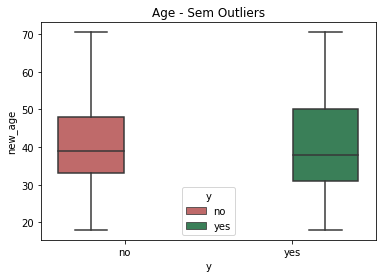

In [9]:
#Boxplot de age após correção outlier
camp_df["new_age"]= np.where(camp_df["age"]>=70.5, 70.5, camp_df["age"])
sns.boxplot(x='y', y='new_age', data=camp_df, hue='y').set_title("Age - Sem Outliers")  

,balance
count,40690.000000
mean,1359.697518
std,3034.248783
min,-8019.000000
25%,74.000000
50%,451.000000
75%,1423.000000
max,102127.000000


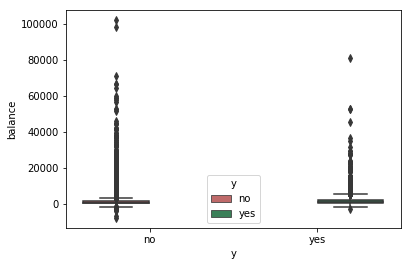

In [10]:
#Corrigindo balance (veja que existe outlier tanto abaixo do Q1 quanto acima do Q3. Nesse caso vamos corrigir ambos)
sns.boxplot(x='y', y='balance', data=camp_df, hue='y')  
camp_df[['balance']].describe()

,new_balance
count,40690.000000
mean,932.096461
std,1171.787155
min,-1949.500000
25%,74.000000
50%,451.000000
75%,1423.000000
max,3446.500000


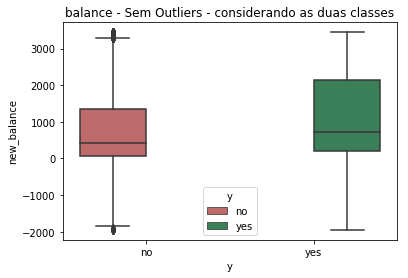

In [11]:
#Boxplot de balance após correção outlier
col         = "balance"
conditions  = [ camp_df[col] >= 3446.5, (camp_df[col] < 3446.5) & (camp_df[col]> -1949.5), camp_df[col] <= -1949.5]
choices     = [ 3446.5, camp_df[col], -1949.5]

camp_df["new_balance"] = np.select(conditions, choices, default=np.nan)

#camp_df["new_balance"]= np.where(camp_df["balance"]<=-1949.5,-1949.5, camp_df["balance"])
#camp_df["new_balance"]= np.where(camp_df["balance"]>=3446.5, 3446.5, camp_df["balance"])
sns.boxplot(x='y', y='new_balance', data=camp_df, hue='y').set_title("balance - Sem Outliers - considerando as duas classes")  
camp_df[['new_balance']].describe()

,duration
count,40690.000000
mean,258.243844
std,257.577068
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


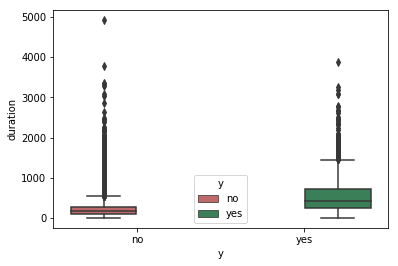

In [12]:
#Corrigindo duration (veja que 75% dos dados, isto é, 30.517 dos clientes tiveram ultimo contato em até 5 minutos). Nesse 
#caso vamos usar x > Q3 + 1,5×AIQ, onde AIQ = Q3-Q1
sns.boxplot(x='y', y='duration', data=camp_df, hue='y')  
camp_df[['duration']].describe()

Text(0.5,1,'duration - considerando as duas classes')

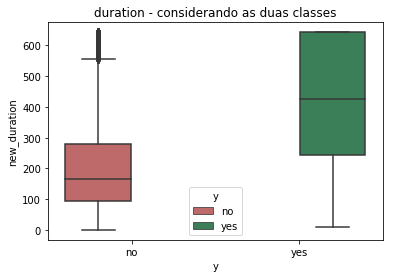

In [13]:
#Boxplot de duration após correção outlier
camp_df["new_duration"]= np.where(camp_df["duration"]>=643, 643, camp_df["duration"])
sns.boxplot(x='y', y='new_duration', data=camp_df, hue='y').set_title("duration - considerando as duas classes")  

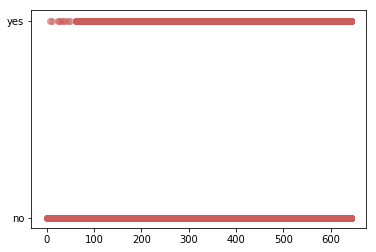

In [14]:
#Como pode ser visto no gráfico abaixo, a feature 'duration' está fortemente conectada com a variável alvo.
#Portanto, vamos ter que removê-la do dataset

scatter_plot = plt.scatter(camp_df['new_duration'], camp_df['y'], alpha=0.5)

In [15]:
camp_df.drop(['new_duration', 'duration'],axis=1, inplace=True)

,campaign
count,40690.000000
mean,2.764586
std,3.110158
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,63.000000


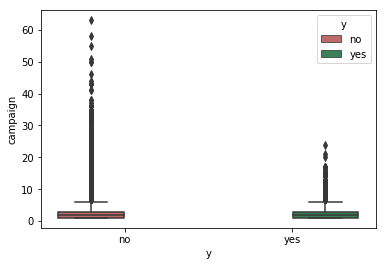

In [16]:
#Corrigindo campaign (veja que 75% dos dados, isto é, 30.517 dos clientes tiveram até 3 contatos realizados 
#para a campanha em questao). Nesse caso vamos usar x > Q3 + 1,5×AIQ, onde AIQ = Q3-Q1

sns.boxplot(x='y', y='campaign', data=camp_df, hue='y')  
camp_df[['campaign']].describe()

Text(0.5,1,'campaign - considerando as duas classes')

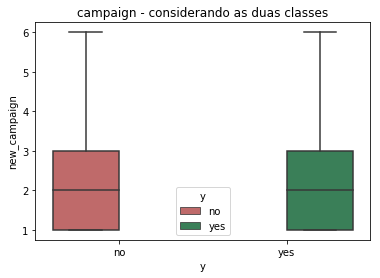

In [17]:
#Boxplot de age após correção outlier
camp_df["new_campaign"]= np.where(camp_df["campaign"]>=6, 6, camp_df["campaign"])
sns.boxplot(x='y', y='new_campaign', data=camp_df, hue='y').set_title("campaign - considerando as duas classes")  

,pdays
count,40690.000000
mean,40.059867
std,100.078281
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


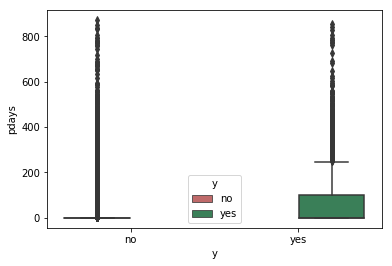

In [18]:
#Corrigindo pdays (veja que 75% dos dados, isto é, 30.517 dos clientes possuem dados = -1, isto é, eles não foram
#contactados anteriormente. Portanto, vamos remover esta variavel do dataset pois é pouco significante para construção
#do modelo

sns.boxplot(x='y', y='pdays', data=camp_df, hue='y')  
camp_df[['pdays']].describe()

In [19]:
#camp_df.drop(['pdays'], axis=1).head(5)
#Removerei logo embaixo

,previous
count,40690.000000
mean,0.579405
std,2.350664
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,275.000000


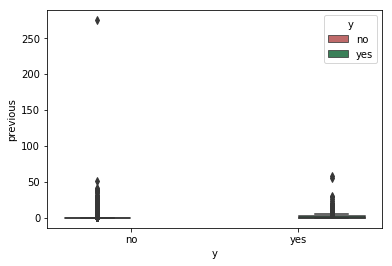

In [20]:
#Corrigindo previous (veja que 75% dos dados, isto é, 30.517 dos clientes tiveram até 0 contatos realizados 
#anteriores a campanha em questao). Mesmo caso da variavel pdays, vamos remover tal variável pois é pouco relevante
#para construção do modelo

sns.boxplot(x='y', y='previous', data=camp_df, hue='y')  
camp_df[['previous']].describe()

In [21]:
#Vamos remover previous e as demais variaveis numericas tratadas

camp_df_dc1 = camp_df.drop(['previous', 'age', 'balance', 'campaign', 'pdays'], axis=1)
camp_df_dc1.head(5)

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,new_age,new_balance,new_campaign
0,management,married,tertiary,no,yes,no,unknown,5,may,unknown,no,58.0,2143.0,1
1,technician,single,secondary,no,yes,no,unknown,5,may,unknown,no,44.0,29.0,1
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,no,33.0,2.0,1
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,no,47.0,1506.0,1
4,unknown,single,unknown,no,no,no,unknown,5,may,unknown,no,33.0,1.0,1


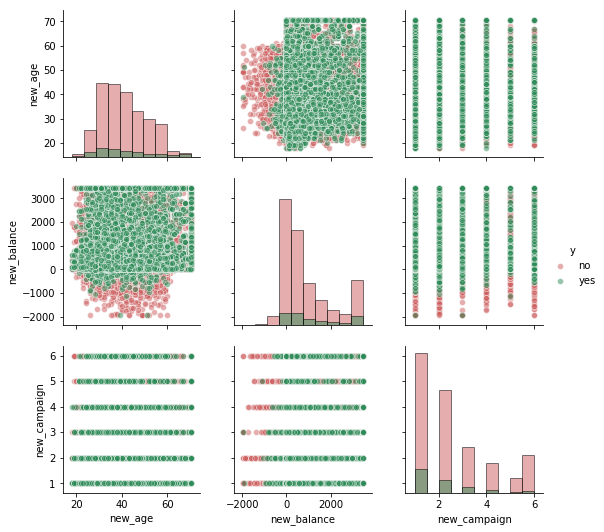

In [22]:
#Reexecutando a correlação entre as variaveis numéricas e a nova distribuição

num_columns = ['new_age', 'new_balance', 'new_campaign', 'y']

sns.pairplot(camp_df_dc1[num_columns], diag_kind='hist',  hue= 'y', height=2.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

#Como pode ser visto a distribuição melhorou bastante após retirada dos outliers, mas tais variaveis sao fracamente
#correlacionadas. Vamos verificar com o metodo de pearson logo abaixo.

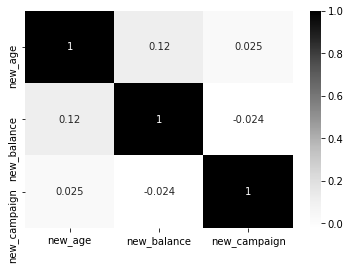

In [23]:
#Avaliando a força de relacionamento das variaveis pelo método de 'pearson'.
#Como já visto no grafico acima, as variaveis de uma forma geral são fracamente correlacionadas linearmente
sns.heatmap(camp_df_dc1[num_columns].corr(method='pearson'), cmap="Greys", annot=True)

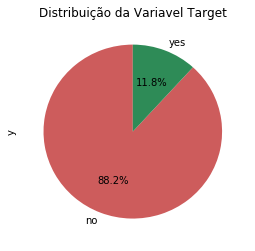

In [24]:
#verificando o balanceamento da classe target, isto é, se o cliente se inscreve à campanha do novo produto ou não
#camp_df_dc1.y.value_counts()/camp_df_dc1.y.count()

value_counts = camp_df_dc1['y'].value_counts()
value_counts.plot.pie(title = 'Distribuição da Variavel Target',autopct='%1.1f%%', startangle=90, figsize=(4,4))

#Como podemos ver as classes estao desbalanceadas. Nao é foco aqui realizar tal balanceamento. Mas a titulo de informacao,
#existem varias tecnicas de balanceamento com undersampling e oversampling

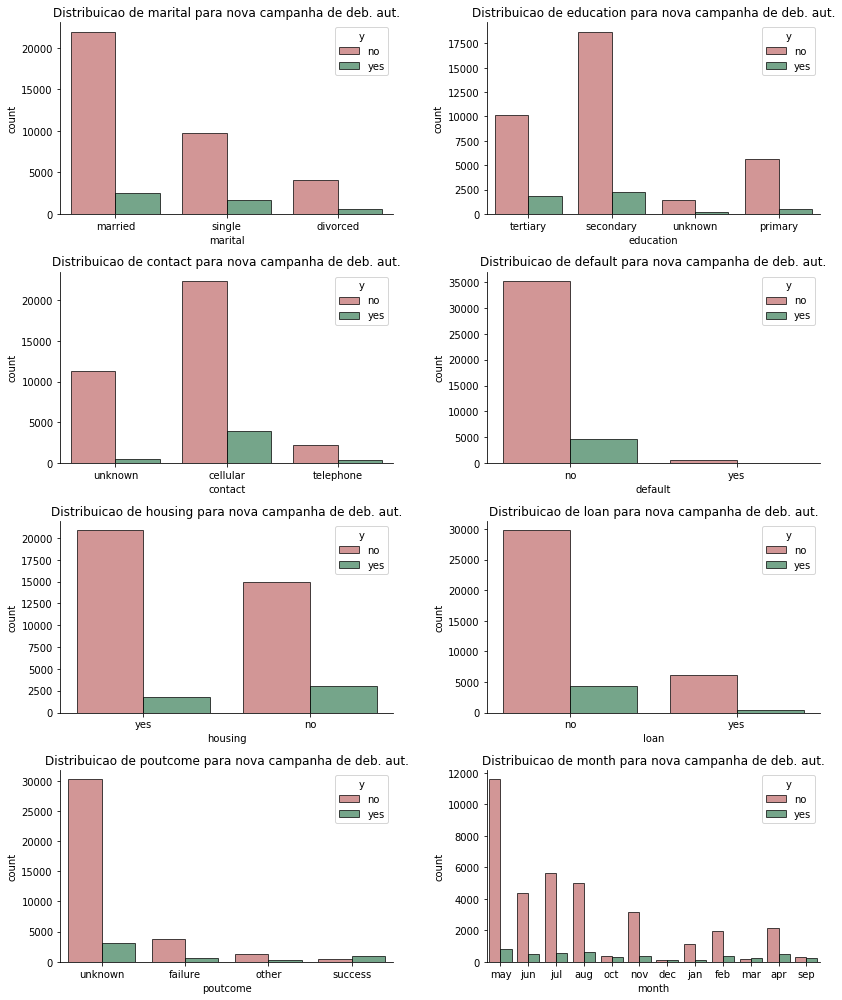

In [25]:
#Vamos analisar as variaveis categoricas

plt.figure(figsize=[12,14])

features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=camp_df_dc1)
    sns.despine()
    plt.title("Distribuicao de {} para nova campanha de deb. aut.".format(f))
    n=n+1
plt.tight_layout()

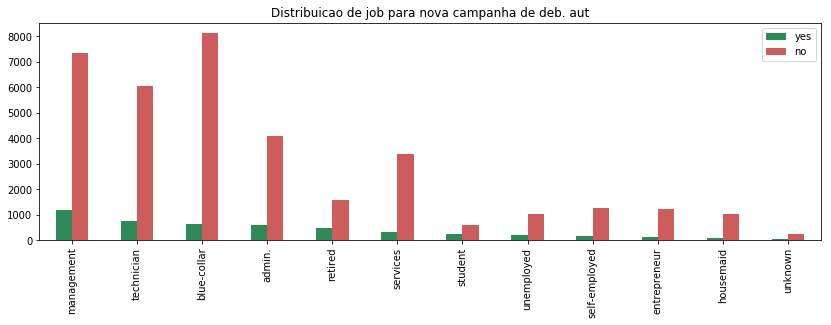

In [26]:
#Vamos verificar individualmente por tipo de trabalho
j_df = pd.DataFrame()

j_df['yes'] = camp_df_dc1[camp_df_dc1['y'] == 'yes']['job'].value_counts()
j_df['no'] = camp_df_dc1[camp_df_dc1['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Distribuicao de job para nova campanha de deb. aut', figsize=(14,4), color=['seagreen','indianred'])

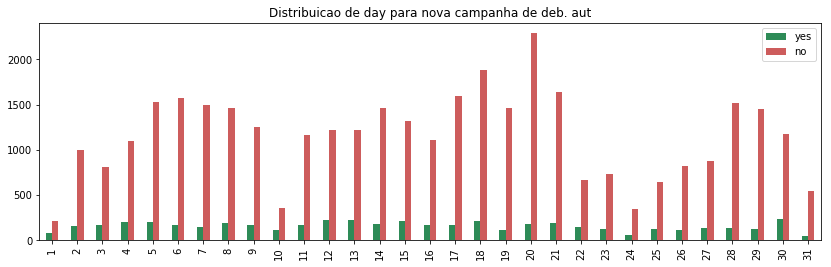

In [27]:
#Vamos verificar individualmente por dia da oferta
d_df = pd.DataFrame()

d_df['yes'] = camp_df_dc1[camp_df_dc1['y'] == 'yes']['day'].value_counts()
d_df['no'] = camp_df_dc1[camp_df_dc1['y'] == 'no']['day'].value_counts()

#d_df.plot.bar(title = 'Distribuicao de day para nova campanha de deb. aut', figsize=(14,4), color=['seagreen','indianred'])
d_df.sort_index().plot.bar(title = 'Distribuicao de day para nova campanha de deb. aut', figsize=(14,4), color=['seagreen','indianred'])

### A partir de análises gráficas podemos tirar algumas conclusões "macro":  
 1) Observe que o tipo de trabalho "blue-collar" destaca como um perfil que tende a não aceitar a nova campanha de debito automatico. 'Services' tambem tende a ter uma rejeição maior comparado com a proporção pela distribuição dos demais tipos de serviço;  
 2) Os piores dias para se ofertar o produto tendem a ser os dias 18 e 20 de cada mês, lembrando que Maio é o pior mês;  
 3) De uma forma geral os clientes que são casados, tem 2º grau de instrução, recebem contatos por telefone, não possuem crédito, tem empréstimo de casa e/ou não tem qualquer tipo de emprestimo e são contactos no mês de Maio tendem a ter uma menor probabilidade de aderirem a campanha do produto ofertado de débito automático.

### Vamos para o preprocessamento visando criar o modelo de previsão de adesão à nova campanha

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Transformando a variavel alvo em '0' e '1'
LE=LabelEncoder()
camp_df_dc1['y']=LE.fit_transform(camp_df_dc1.y.values)
camp_df_dc1.rename(columns={'y': 'acp_deposit'}, inplace=True)

In [29]:
camp_df_dc1['housing']=LE.fit_transform(camp_df_dc1.housing.values)
camp_df_dc1['loan']=LE.fit_transform(camp_df_dc1.housing.values)
camp_df_dc1['default']=LE.fit_transform(camp_df_dc1.housing.values)

In [30]:
camp_df_dc1.head(5)

,job,marital,education,default,housing,loan,contact,day,month,poutcome,acp_deposit,new_age,new_balance,new_campaign
0,management,married,tertiary,1,1,1,unknown,5,may,unknown,0,58.0,2143.0,1
1,technician,single,secondary,1,1,1,unknown,5,may,unknown,0,44.0,29.0,1
2,entrepreneur,married,secondary,1,1,1,unknown,5,may,unknown,0,33.0,2.0,1
3,blue-collar,married,unknown,1,1,1,unknown,5,may,unknown,0,47.0,1506.0,1
4,unknown,single,unknown,0,0,0,unknown,5,may,unknown,0,33.0,1.0,1


In [31]:
#Transformando as features categóricas em one-hot numeric columns
camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["contact"],prefix='contact',drop_first=True)],axis=1)
camp_df_dc1.drop(['contact'],axis=1, inplace=True)

In [32]:
camp_df_dc1.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'day',
       'month', 'poutcome', 'acp_deposit', 'new_age', 'new_balance',
       'new_campaign', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [33]:
camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["job"],prefix='job',drop_first=True)],axis=1)
camp_df_dc1.drop(['job'],axis=1, inplace=True)

In [34]:
camp_df_dc1.columns

Index(['marital', 'education', 'default', 'housing', 'loan', 'day', 'month',
       'poutcome', 'acp_deposit', 'new_age', 'new_balance', 'new_campaign',
       'contact_telephone', 'contact_unknown', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'],
      dtype='object')

In [35]:
#Transformando as demais features categóricas em one-hot numeric columns
camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["marital"],prefix='marital',drop_first=True)],axis=1)
camp_df_dc1.drop(['marital'],axis=1, inplace=True)

camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["education"],prefix='education',drop_first=True)],axis=1)
camp_df_dc1.drop(['education'],axis=1, inplace=True)

camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["poutcome"],prefix='poutcome',drop_first=True)],axis=1)
camp_df_dc1.drop(['poutcome'],axis=1, inplace=True)

camp_df_dc1 = pd.concat([camp_df_dc1,pd.get_dummies(camp_df_dc1["month"],prefix='month',drop_first=True)],axis=1)
camp_df_dc1.drop(['month'],axis=1, inplace=True)

In [36]:
camp_df_dc1.columns

Index(['default', 'housing', 'loan', 'day', 'acp_deposit', 'new_age',
       'new_balance', 'new_campaign', 'contact_telephone', 'contact_unknown',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [37]:
##camp_df_dc1['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

In [38]:
camp_df_dc1.head(5)

,default,housing,loan,day,acp_deposit,new_age,new_balance,new_campaign,contact_telephone,contact_unknown,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,1,1,5,0,58.0,2143.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,5,0,44.0,29.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,5,0,33.0,2.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,5,0,47.0,1506.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,5,0,33.0,1.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
#Normalizando as variáveis numericas
from sklearn.preprocessing import StandardScaler

standard_columns = ['new_age', 'new_balance', 'new_campaign']
SC = StandardScaler()
camp_df_dc1[standard_columns] = SC.fit_transform(camp_df_dc1[standard_columns])

In [40]:
camp_df_dc1.describe()

,default,housing,loan,day,acp_deposit,new_age,new_balance,new_campaign,contact_telephone,contact_unknown,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,4.069000e+04,4.069000e+04,4.069000e+04,40690.000000,40690.000000,...,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000
mean,0.556918,0.556918,0.556918,15.808405,0.117646,1.015926e-16,3.155069e-15,2.544363e-14,0.063898,0.289285,...,0.004743,0.058073,0.031162,0.152716,0.119145,0.010420,0.305063,0.086876,0.016220,0.012780
std,0.496756,0.496756,0.496756,8.318281,0.322192,1.000012e+00,1.000012e+00,1.000012e+00,0.244574,0.453436,...,0.068708,0.233885,0.173759,0.359718,0.323963,0.101548,0.460440,0.281657,0.126323,0.112323
min,0.000000,0.000000,0.000000,1.000000,0.000000,-2.199713e+00,-2.459177e+00,-8.696701e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.000000,0.000000,-7.549332e-01,-7.323062e-01,-8.696701e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,16.000000,0.000000,-1.770213e-01,-4.105715e-01,-2.441619e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,21.000000,0.000000,6.898465e-01,4.189409e-01,3.813463e-01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,31.000000,1.000000,2.857016e+00,2.145812e+00,2.257871e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
camp_df_dc1.columns

Index(['default', 'housing', 'loan', 'day', 'acp_deposit', 'new_age',
       'new_balance', 'new_campaign', 'contact_telephone', 'contact_unknown',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings(action="ignore")

#Vamos usar o StratifiedShuffleSplit para preservar a proporcionalidade das classes.
stratshuffsplit=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in stratshuffsplit.split(camp_df_dc1.drop("acp_deposit",axis=1), camp_df_dc1.acp_deposit):
    traindf=camp_df_dc1.loc[train_index].dropna()
    testdf= camp_df_dc1.loc[test_index].dropna()

In [43]:
traindf.shape

(29343, 40)

In [44]:
testdf.shape

(7286, 40)

In [45]:
testdf.acp_deposit.value_counts()/testdf.acp_deposit.count()

0.0    0.921356
1.0    0.078644
Name: acp_deposit, dtype: float64

In [46]:
xtrain=traindf.drop('acp_deposit', axis=1)
ytrain=traindf.acp_deposit

xtest=testdf.drop('acp_deposit', axis=1)
ytest=testdf.acp_deposit

In [47]:
xtrain.head(5)

,default,housing,loan,day,new_age,new_balance,new_campaign,contact_telephone,contact_unknown,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
24444,1.0,1.0,1.0,17.0,-0.754933,-0.795458,-0.869670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20725,0.0,0.0,0.0,13.0,-0.080703,-0.759615,-0.244162,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8743,1.0,1.0,1.0,4.0,-0.754933,-0.411425,1.006855,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17135,1.0,1.0,1.0,25.0,-0.562296,0.034054,2.257871,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24842,0.0,0.0,0.0,18.0,1.364077,0.197908,-0.869670,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Vamos treinar o modelo usando Random Forest

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=1)

# grid searh para escolha da melhor combinação de hiperparâmetros 
pg_rf={'n_estimators': [100, 200, 400],'max_depth': [20, 40 ,60]}

gs_rf=GridSearchCV(estimator= rf,
                   param_grid= pg_rf,
                   scoring='accuracy',
                   cv=2)

# cross validation combinado com grid search e k-fold cv = 5
gs_rf_scores = cross_val_score(gs_rf, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

In [51]:
#Gerando as scoragens pelo melhor modelo do Random Forest
gs_rf.fit(xtrain, ytrain)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(xtrain, ytrain)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf_best.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf_best.score(xtest, ytest)*100))

Train Accuracy:   95.1%
CV Mean Accuracy: 92.3%
Test Accuracy:    92.1%


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

ypreds = gs_rf_best.predict(xtest)
print(confusion_matrix(ypreds ,ytest))
print(classification_report(ypreds ,ytest))

[[6673  535]
 [  40   38]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      7208
         1.0       0.07      0.49      0.12        78

    accuracy                           0.92      7286
   macro avg       0.53      0.71      0.54      7286
weighted avg       0.98      0.92      0.95      7286



### Avaliação da Matriz de Confusão:

Como era de esperar, devido a base disponibilizada estar bastante desabalanceada (92% classe negativa e apenas 8% classe positiva), o modelo foi muito bem para prever a classe dominante negativa, isto é, a não adesão à nova campanha de débito automático e muito mal para prever o contrário. Podemos ver esse comportamento através das scoragens de precisão (identificação correta da classe dentre todos os casos existentes), recall (o quão bom meu modelo identifica determinada classe) e o f1-score (balanceamento entre precisão e recall) para as duas classificações avaliadas neste trabalho (1 ou 0 para a variável target 'acp_deposit' ?).

O próximo passo natural aqui, seria explorar alguma técnica de balanceamento e/ou rever o corte de escoragem que define a previsão do modelo. A título de exemplificação, vamos explorar na sequência um undersampling com a proporção 2x classe negativa e 1x classe positiva.

### Avaliando balanceamento via undersampling 

In [48]:
#Tamanho original do dataset
camp_df_dc1.acp_deposit.value_counts()

0    35903
1     4787
Name: acp_deposit, dtype: int64

In [49]:
#Avaliando balanceamento via undersampling
from sklearn.utils import resample

mask = camp_df_dc1.acp_deposit == 0
df_neg_class = camp_df_dc1[mask]
df_pos_class = camp_df_dc1[~mask]

df_downsample = resample(df_pos_class, replace=True, n_samples=int(len(df_neg_class)/2), random_state=42)
camp_df_dc2 = pd.concat([df_neg_class, df_downsample])
camp_df_dc2.acp_deposit.value_counts()

0    35903
1    17951
Name: acp_deposit, dtype: int64

In [50]:
for train_index2, test_index2 in stratshuffsplit.split(camp_df_dc2.drop("acp_deposit",axis=1), camp_df_dc2.acp_deposit):
    traindf2=camp_df_dc2.loc[train_index2].dropna()
    testdf2= camp_df_dc2.loc[test_index2].dropna()

xtrain2=traindf2.drop('acp_deposit', axis=1)
ytrain2=traindf2.acp_deposit

xtest2=testdf2.drop('acp_deposit', axis=1)
ytest2=testdf2.acp_deposit    

In [51]:
traindf2.acp_deposit.value_counts()/traindf2.acp_deposit.count()

0.0    0.666388
1.0    0.333612
Name: acp_deposit, dtype: float64

In [52]:
testdf2.acp_deposit.value_counts()/testdf2.acp_deposit.count()

0.0    0.667814
1.0    0.332186
Name: acp_deposit, dtype: float64

In [58]:
gs_rf2=GridSearchCV(estimator= rf,
                   param_grid= pg_rf,
                   scoring='accuracy',
                   cv=2)

# cross validation combinado com grid search e k-fold cv = 5
gs_rf_scores2 = cross_val_score(gs_rf2, X=xtrain2, y=ytrain2, cv=5,scoring='accuracy', n_jobs=-1)

In [60]:
#Gerando as scoragens pelo melhor modelo do Random Forest
gs_rf2.fit(xtrain2, ytrain2)
gs_rf_best2 = gs_rf2.best_estimator_
gs_rf_best2.fit(xtrain2, ytrain2)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf_best2.score(xtrain2, ytrain2)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores2)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf_best2.score(xtest2, ytest2)*100))

Train Accuracy:   96.0%
CV Mean Accuracy: 75.0%
Test Accuracy:    75.8%


In [62]:
ypreds2 = gs_rf_best2.predict(xtest2)
print(confusion_matrix(ypreds2 ,ytest2))
print(classification_report(ypreds2 ,ytest2))

[[6889 2315]
 [ 288 1255]]
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84      9204
         1.0       0.35      0.81      0.49      1543

    accuracy                           0.76     10747
   macro avg       0.66      0.78      0.67     10747
weighted avg       0.87      0.76      0.79     10747



### Avaliação da Matriz de Confusão após undersampling:

Como pode ser visto, após o undersampling a matriz de confusão deu uma melhorada considerável em relação à predição da classe positiva, ou seja, do cliente aderir a campanha de débito automático. Aqui ainda cabe mais explorações em relação ao balanceamento do data set original, mas não iremos avançar pois o objetivo é mostrar o end-to-end de um trabalho de investigação analítica com modelo preditivo.

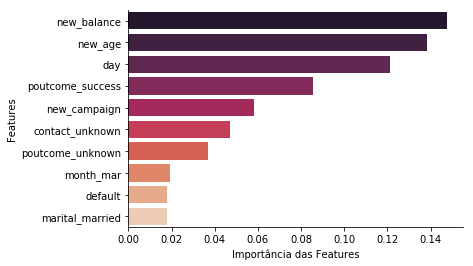

In [64]:
#Levantando as variáveis mais importante do modelo
importances= gs_rf_best2.feature_importances_

feature_importances= pd.Series(importances, index=xtrain2.columns).sort_values(ascending=False)

sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")

sns.despine()
plt.xlabel("Importância das Features")
plt.ylabel("Features")
plt.show()

### Avaliação das variáveis que mais influenciam no modelo:

Como pode ser visto, o saldo médio anual dos clientes com o banco, a idade, o dia do mês, o resultado de adesão em outras campanhas e a quantidade de contatos realizados ao longo da campanha atual influenciam diretamente na escolha ou não do novo produto de débito automático promovido pela equipe de marketing.

Um gráfico bacana de analisar as influencias das variáveis na escoragem do modelo preditivo é o método SHAP que carrego logo abaixo. Ele explica para o conjunto de treinamento, isto é, para cada instância da população do data set de treinamento quais o valores das features que mais tiveram influência sobre a predição em questão. A partir dessa análise temos condições de entender um perfil macro que mais influencia na adesão à nova campanha.

### Vamos treinar o modelo usando o Gradient Boosting Decision Trees para explorar o método SHAP

In [ ]:
import xgboost as xgb

# estimator
xb= xgb.XGBClassifier(random_state=1)

pg_xb={'n_estimators':[100,200,400], 'max_depth':[20,40,50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)

gs_xb_scores = cross_val_score(gs_xb, X=xtrain2, y=ytrain2, cv=5,scoring='accuracy', n_jobs=-1)

gs_xb.fit(xtrain2, ytrain2)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(xtrain2, ytrain2)

print('Train Accuracy:   {0:.1f}%'.format(gs_xb_best.score(xtrain2, ytrain2)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_xb_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb_best.score(xtest2, ytest2)*100))

In [ ]:
ypreds2 = gs_xb_best.predict(xtest2)
print(confusion_matrix(ypreds2 ,ytest2))
print(classification_report(ypreds2 ,ytest2))

In [ ]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(gs_xb_best)
shap_values = explainer.shap_values(xtrain)

In [ ]:
# para cada instância, o plot mostra como os valores das features tem influência sobre a predição
shap.force_plot(explainer.expected_value, shap_values[0,:], xtrain.iloc[0,:],matplotlib=True)

In [ ]:
#Esse plot mostra um resumo do impacto das principais features na saída do modelo
shap.summary_plot(shap_values, xtrain)

### Análise:

Como podemos ver no gráfico acima, por exemplo, há uma influência positiva na predição binária do modelo quanto maior são os valores de idade e saldo médio do cliente. Os dois plots de dependência abaixo reforçam isso.

In [ ]:
shap.dependence_plot("new_balance", shap_values, xtrain)

In [ ]:
shap.dependence_plot("new_age", shap_values, xtrain)